<a href="https://colab.research.google.com/github/xvdp/stylegan2-ada-pytorch/blob/main/Copy_of_x_project_w_mediapipe_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Align and Project with MediaPipe and StyleGan_Ada_Pytorch

Leverage MediaPipe which is faster than dlib

Ports image alignment heuristics from https://github.com/NVlabs/ffhq-dataset/blob/master/download_ffhq.py
to use mediapipe

    x_align_face  mediapipe and dlib functions
    x_projector   simplified projector to run without saving files, unless requested

In [ ]:
! pip install mediapipe

     |████████████████████████████████| 36.1MB 125kB/s 


In [ ]:
import PIL.Image as Image
#import imageio
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
import torch
mpl.rcParams['xtick.labelbottom'] =False
mpl.rcParams['ytick.labelleft'] =False
torch.__version__

'1.8.1+cu101'

In [ ]:
import os
_dir = os.getcwd()
os.listdir()

['.config', 'sample_data']

In [ ]:
!rm -rf stylegan2-ada-pytorch/
!git clone https://github.com/xvdp/stylegan2-ada-pytorch.git

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 131 (delta 0), reused 5 (delta 0), pack-reused 125
Receiving objects: 100% (131/131), 2.25 MiB | 37.21 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
cd stylegan2-ada-pytorch

/content/stylegan2-ada-pytorch


In [ ]:
import x_align_face, x_projector


In [ ]:
pkl = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
plk_met = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl"

In [ ]:
url0 ="https://i.guim.co.uk/img/media/c7662daf2d0ca9e59cdfef659c8d86e1da7b4f7e/318_0_4800_2880/master/4800.jpg?width=1920&quality=85&auto=format&fit=max&s=284ad659f3663f2cae8e78b1de09225e"
url1 ="https://i.guim.co.uk/img/media/528a80d5119aeff64856ec837fdd7d06a2beb0c1/0_0_4800_3200/master/4800.jpg?width=1920&quality=85&auto=format&fit=max&s=24501d47b989e9cdade6826b9ac5079a"
url2 ="https://i.guim.co.uk/img/media/c1355920f4ffe54dc9552043f2c8e7e893f39032/1094_344_2788_1673/master/2788.jpg?width=1920&quality=85&auto=format&fit=max&s=6c31da2732b75a999adbbc42f099a744"
urls = [url0, url1, url2]

In [ ]:
# image alighed using eyes and mouth heuristics and mediapipe
img = x_align_face.ffhq_align(url1)

(529, 90, 1330, 892)


In [ ]:
#fullimg = x_align_face.loadimg(url1)
# original image  and mediapipe landmarks
fullimg, landmarks =  x_align_face.segment_face(url1)
# segmentation drawn on image
mpimg = x_align_face.mp_draw_segmentation(fullimg, landmarks)

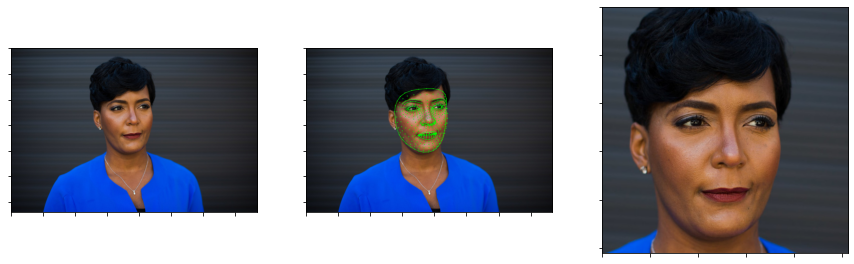

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(fullimg)
plt.subplot(132)
plt.imshow(mpimg)
plt.subplot(133)

plt.imshow(img)
plt.show()

In [ ]:
Gm, out_m = x_projector.mp_project(plk_met, img)

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl"...
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


RuntimeError: ignored

In [ ]:
G, imgs = x_projector.mp_project(pkl, img)

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
step  100/100: dist 0.23 loss 0.63             
Elapsed: 9.7 s


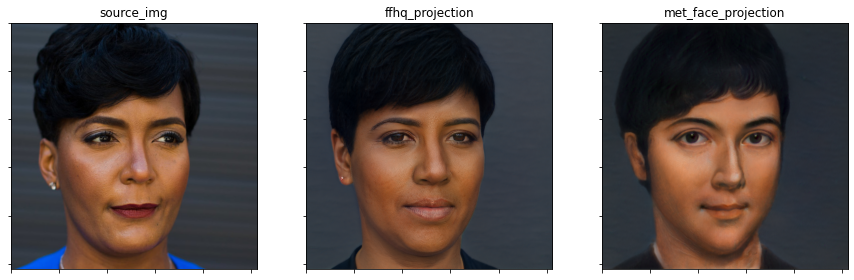

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("source_img")
plt.imshow(img)
plt.subplot(132)
plt.title("ffhq_projection")
plt.imshow(imgs['image'])
plt.subplot(133)
plt.title("met_face_projection")
plt.imshow(out_m['image'])
plt.show()

(630, 27, 1457, 854)


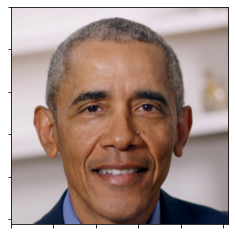

In [ ]:
img0 = x_align_face.ffhq_align(url0)
plt.imshow(img0)
plt.show()

In [ ]:
Gm, out_m0 = x_projector.mp_project(Gm, img0)
G, out0 = x_projector.mp_project(G, img0)

Computing W midpoint and stddev using 10000 samples...
step  100/100: dist 0.30 loss 0.70             
Elapsed: 10.0 s
Computing W midpoint and stddev using 10000 samples...
step  100/100: dist 0.24 loss 0.64             
Elapsed: 10.0 s


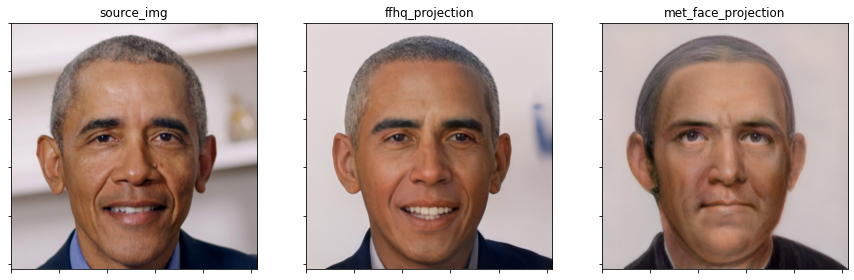

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("source_img")
plt.imshow(img0)
plt.subplot(132)
plt.title("ffhq_projection")
plt.imshow(out0['image'])
plt.subplot(133)
plt.title("met_face_projection")
plt.imshow(out_m0['image'])
plt.show()

(632, 155, 1275, 798)


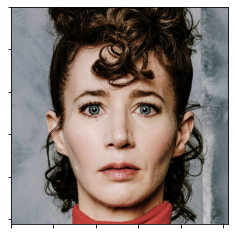

In [ ]:
img2 = x_align_face.ffhq_align(url2)
plt.imshow(img2)
plt.show()

In [ ]:
Gm, out_m2 = x_projector.mp_project(Gm, img2)
G, out2 = x_projector.mp_project(G, img2)

Computing W midpoint and stddev using 10000 samples...
step  100/100: dist 0.41 loss 0.81             
Elapsed: 9.7 s
Computing W midpoint and stddev using 10000 samples...
step  100/100: dist 0.38 loss 0.77             
Elapsed: 10.2 s


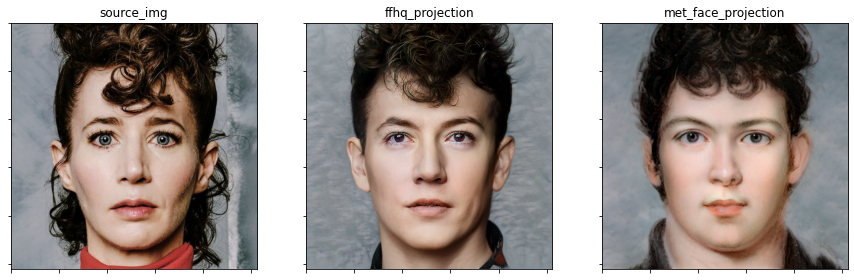

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("source_img")
plt.imshow(img2)
plt.subplot(132)
plt.title("ffhq_projection")
plt.imshow(out2['image'])
plt.subplot(133)
plt.title("met_face_projection")
plt.imshow(out_m2['image'])
plt.show()